In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/home/ataur/Downloads/Datasets_PCA_Problem Statement/heart disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
cp           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
trestbps     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chol           AxesSubplot(0.125,0.518913;0.168478x0.16413)
fbs         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
restecg     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
thalach     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
exang          AxesSubplot(0.125,0.321957;0.168478x0.16413)
oldpeak     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
slope       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
ca          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
thal              AxesSubplot(0.125,0.125;0.168478x0.16413)
target         AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

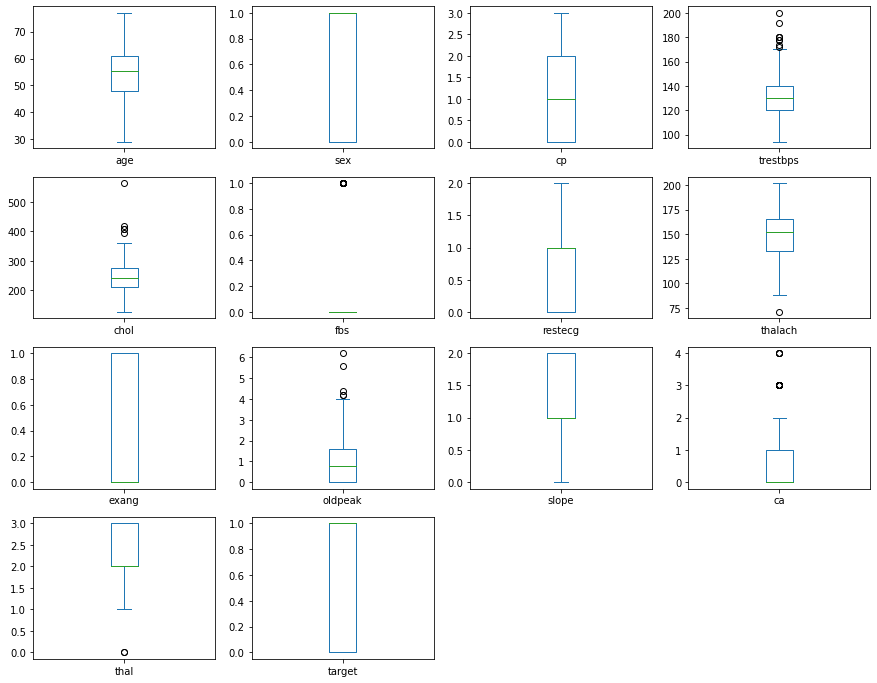

In [15]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(15,12))

In [16]:
# first Column
iqr = df['trestbps'].quantile(0.75) - df['trestbps'].quantile(0.25)
iqr

20.0

In [17]:
lower_limit = df['trestbps'].quantile(0.25) - 1.5*(iqr)
lower_limit

90.0

In [18]:
upper_limit = df['trestbps'].quantile(0.75) + 1.5*(iqr)
upper_limit

170.0

In [19]:
df['trestbps'] = np.where(df['trestbps'] > upper_limit, upper_limit, np.where(df['trestbps'] < lower_limit, lower_limit, df['trestbps']))

In [20]:
# Second Column
iqr = df['chol'].quantile(0.75) - df['chol'].quantile(0.25)
iqr

63.75

In [21]:
lower_limit = df['chol'].quantile(0.25) - 1.5*(iqr)
lower_limit

115.375

In [22]:
upper_limit = df['chol'].quantile(0.75) + 1.5*(iqr)
upper_limit

370.375

In [23]:
df['chol'] = np.where(df['chol'] > upper_limit, upper_limit, np.where(df['chol'] < lower_limit, lower_limit, df['chol']))

In [24]:
# Third Column
iqr = df['thalach'].quantile(0.75) - df['thalach'].quantile(0.25)
iqr

32.75

In [25]:
lower_limit = df['thalach'].quantile(0.25) - 1.5*(iqr)
lower_limit

84.125

In [26]:
upper_limit = df['thalach'].quantile(0.75) + 1.5*(iqr)
upper_limit

215.125

In [27]:
df['thalach'] = np.where(df['thalach'] > upper_limit, upper_limit, np.where(df['thalach'] < lower_limit, lower_limit, df['thalach']))

In [28]:
# Forth Column
iqr = df['oldpeak'].quantile(0.75) - df['oldpeak'].quantile(0.25)
iqr

1.6

In [29]:
lower_limit = df['oldpeak'].quantile(0.25) - 1.5*(iqr)
lower_limit

-2.4000000000000004

In [30]:
upper_limit = df['oldpeak'].quantile(0.75) + 1.5*(iqr)
upper_limit

4.0

In [31]:
df['oldpeak'] = np.where(df['oldpeak'] > upper_limit, upper_limit, np.where(df['oldpeak'] < lower_limit, lower_limit, df['oldpeak']))

In [32]:
# Fifth Column
iqr = df['ca'].quantile(0.75) - df['ca'].quantile(0.25)
iqr

1.0

In [33]:
lower_limit = df['ca'].quantile(0.25) - 1.5*(iqr)
lower_limit

-1.5

In [34]:
upper_limit = df['ca'].quantile(0.75) + 1.5*(iqr)
upper_limit

2.5

In [35]:
df['ca'] = np.where(df['ca'] > upper_limit, upper_limit, np.where(df['ca'] < lower_limit, lower_limit, df['ca']))

In [36]:
# Sixth Column
iqr = df['thal'].quantile(0.75) - df['thal'].quantile(0.25)
iqr

1.0

In [37]:
lower_limit = df['thal'].quantile(0.25) - 1.5*(iqr)
lower_limit

0.5

In [38]:
upper_limit = df['thal'].quantile(0.75) + 1.5*(iqr)
upper_limit

4.5

In [39]:
df['thal'] = np.where(df['thal'] > upper_limit, upper_limit, np.where(df['thal'] < lower_limit, lower_limit, df['thal']))

In [40]:
# Seven Column
iqr = df['fbs'].quantile(0.75) - df['fbs'].quantile(0.25)
iqr

0.0

In [41]:
lower_limit = df['fbs'].quantile(0.25) - 1.5*(iqr)
lower_limit

0.0

In [42]:
upper_limit = df['fbs'].quantile(0.75) + 1.5*(iqr)
upper_limit

0.0

In [43]:
df['fbs'] = np.where(df['fbs'] > upper_limit, upper_limit, np.where(df['fbs'] < lower_limit, lower_limit, df['fbs']))

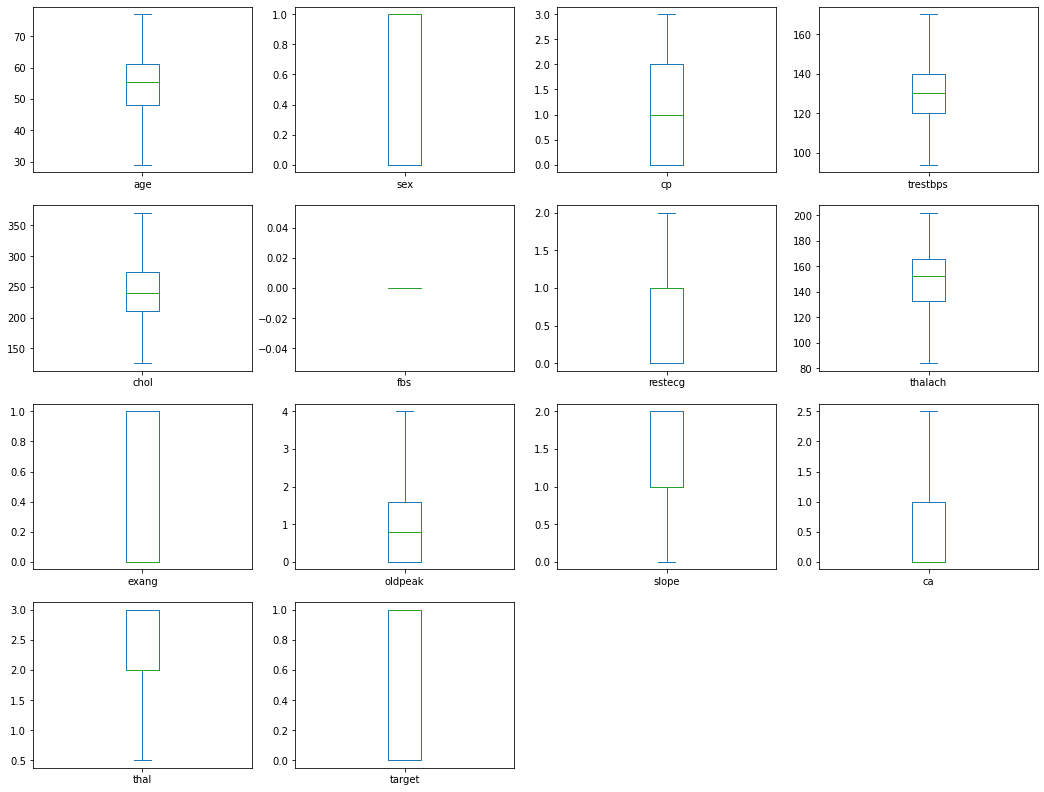

In [44]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10, figsize=(18,14));

# spliting Data

In [45]:
x = df.iloc[:, [0,2,3,6,7,9,11,12,13]]

In [46]:
y = df.iloc[:, [1,4,8,10]]

In [47]:
y

,sex,chol,exang,slope
0,1,233.0,0,0
1,1,250.0,0,0
2,0,204.0,0,2
3,1,236.0,0,2
4,0,354.0,1,2
...,...,...,...,...
298,0,241.0,1,1
299,1,264.0,0,1
300,1,193.0,0,1
301,1,131.0,1,1


# Normalization

In [48]:
def norm_func(i):
    x = (i-i.min()) / (i.max()-i.min())
    return(x)

In [49]:
y_norm = norm_func(y)

In [50]:
y_norm

,sex,chol,exang,slope
0,1.0,0.437852,0.0,0.0
1,1.0,0.507417,0.0,0.0
2,0.0,0.319182,0.0,1.0
3,1.0,0.450128,0.0,1.0
4,0.0,0.932992,1.0,1.0
...,...,...,...,...
298,0.0,0.470588,1.0,0.5
299,1.0,0.564706,0.0,0.5
300,1.0,0.274169,0.0,0.5
301,1.0,0.020460,1.0,0.5


# Joining data for Clustering

In [51]:
xy = pd.concat([x, y_norm], axis=1)

In [52]:
xy

,age,cp,trestbps,restecg,thalach,oldpeak,ca,thal,target,sex,chol,exang,slope
0,63,3,145.0,0,150.0,2.3,0.0,1.0,1,1.0,0.437852,0.0,0.0
1,37,2,130.0,1,187.0,3.5,0.0,2.0,1,1.0,0.507417,0.0,0.0
2,41,1,130.0,0,172.0,1.4,0.0,2.0,1,0.0,0.319182,0.0,1.0
3,56,1,120.0,1,178.0,0.8,0.0,2.0,1,1.0,0.450128,0.0,1.0
4,57,0,120.0,1,163.0,0.6,0.0,2.0,1,0.0,0.932992,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140.0,1,123.0,0.2,0.0,3.0,0,0.0,0.470588,1.0,0.5
299,45,3,110.0,1,132.0,1.2,0.0,3.0,0,1.0,0.564706,0.0,0.5
300,68,0,144.0,1,141.0,3.4,2.0,3.0,0,1.0,0.274169,0.0,0.5
301,57,0,130.0,1,115.0,1.2,1.0,3.0,0,1.0,0.020460,1.0,0.5


# Dimension Reduction using PCA

In [53]:
pca = PCA(n_components=13)

In [54]:
pca_v = pca.fit_transform(xy)

In [55]:
pca_v

array([[ 2.69916644e+00,  1.48619352e+01,  5.89786358e+00, ...,
        -6.24678960e-02,  4.65300395e-01,  7.35073248e-02],
       [-3.98443185e+01,  1.25991474e+00, -1.05426590e+01, ...,
        -1.53922509e-01,  4.41078134e-01,  2.06683204e-01],
       [-2.44889638e+01, -2.22784634e-01, -9.11965071e+00, ...,
        -6.56024871e-02, -3.00422245e-01, -2.44932131e-01],
       ...,
       [ 1.23907831e+01,  1.34167738e+01,  9.47797428e+00, ...,
        -1.77508030e-02, -3.14893181e-02, -2.41717835e-01],
       [ 3.41602147e+01, -5.65987206e+00, -2.95766834e+00, ...,
        -4.02836771e-02,  1.59654352e-01, -4.29787240e-01],
       [-2.34776072e+01,  2.58013548e+00,  6.74444043e+00, ...,
         8.80856705e-01,  2.74176882e-01, -1.38513588e-01]])

# PCA Weights

In [57]:
pca.components_

array([[ 1.85378622e-01, -1.25947211e-02,  1.09341647e-01,
        -1.33873641e-03, -9.76178846e-01,  1.75392946e-02,
         1.02656547e-02,  2.77522268e-03, -9.29585754e-03,
         6.67821272e-04,  3.28287508e-04,  7.66482779e-03,
        -5.21380051e-03],
       [ 1.58032468e-01,  6.41393741e-03,  9.77429362e-01,
        -3.64481764e-03,  1.39639327e-01,  8.55094830e-03,
         4.14144362e-03,  1.28898184e-03, -2.24329443e-03,
        -1.77921671e-03,  1.69250110e-03, -2.72207692e-04,
        -9.73862460e-04],
       [ 9.69396123e-01,  6.53234132e-03, -1.80351720e-01,
        -4.09933196e-03,  1.64018558e-01, -2.26082523e-04,
         2.60873383e-02,  4.27228770e-04,  3.45042416e-04,
        -6.66790804e-03,  4.16751415e-03, -6.07955302e-03,
         1.77697829e-03],
       [-1.03023510e-02, -5.13146537e-01, -6.88881162e-03,
        -4.00535460e-02,  2.46653809e-02,  6.79772132e-01,
         3.69019263e-01,  1.90362183e-01, -2.48035818e-01,
         8.69452025e-02,  1.59145130e

In [58]:
pca.components_[0]

array([ 1.85378622e-01, -1.25947211e-02,  1.09341647e-01, -1.33873641e-03,
       -9.76178846e-01,  1.75392946e-02,  1.02656547e-02,  2.77522268e-03,
       -9.29585754e-03,  6.67821272e-04,  3.28287508e-04,  7.66482779e-03,
       -5.21380051e-03])

In [60]:
var = pca.explained_variance_ratio_

In [61]:
var

array([6.09334010e-01, 3.17866767e-01, 6.82172120e-02, 1.48180564e-03,
       1.08723926e-03, 6.79709561e-04, 4.05081461e-04, 3.12981360e-04,
       2.23275381e-04, 1.73358058e-04, 1.17861538e-04, 6.38332948e-05,
       3.68652052e-05])

# Cumulative Variance

In [62]:
var1 = np.cumsum(np.round(var, decimals=4)*100)

In [63]:
var1

array([ 60.93,  92.72,  99.54,  99.69,  99.8 ,  99.87,  99.91,  99.94,
        99.96,  99.98,  99.99, 100.  , 100.  ])

# Variance plot for Pca components 

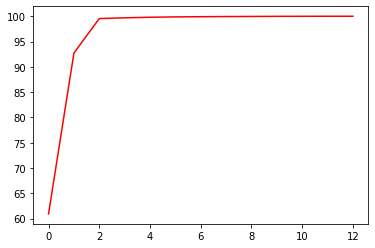

In [64]:
plt.plot(var1, color='red')

# PCa Values to a data frame

In [65]:
data = pd.DataFrame(pca_v)

In [66]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.699166,14.861935,5.897864,-0.901321,2.368162,-0.546763,0.890043,-0.763041,0.653250,-0.169109,-0.062468,0.465300,0.073507
1,-39.844319,1.259915,-10.542659,1.862781,2.573583,-0.702792,0.567768,0.323955,0.247282,-0.254347,-0.153923,0.441078,0.206683
2,-24.488964,-0.222785,-9.119651,0.396847,0.356996,-0.482843,0.631301,-0.421774,-0.741057,-0.093026,-0.065602,-0.300422,-0.244932
3,-28.669926,-6.799088,8.198834,0.100304,0.025828,-0.694748,0.118750,0.334467,0.486168,-0.271704,-0.184502,-0.140639,0.008514
4,-13.825622,-8.741446,6.704065,0.167250,-0.930977,-1.103685,0.413327,0.445588,-0.206939,0.782482,-0.302792,-0.240148,0.341397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,27.415875,5.221385,-3.466355,-0.752770,-1.316859,-0.693455,-0.690758,0.558949,-0.435959,0.651092,0.442603,0.145149,-0.100630
298,13.098262,-24.714687,-8.193215,-1.121011,1.976047,0.445531,-1.105021,0.278533,0.072390,-0.075029,0.722038,-0.025084,0.189404
299,12.390783,13.416774,9.477974,2.398156,0.539170,0.039397,-0.026057,0.736161,0.076051,-0.726029,-0.017751,-0.031489,-0.241718
300,34.160215,-5.659872,-2.957668,0.247368,-0.633434,0.041339,-0.663161,0.483480,0.267449,0.197499,-0.040284,0.159654,-0.429787


In [67]:
data.columns = 'comp0', 'comp1', 'comp2', 'comp3', 'comp4', 'comp5', 'comp6', 'comp7', 'comp8', 'comp9', 'comp10', 'comp11', 'comp12'

In [68]:
data

,comp0,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12
0,2.699166,14.861935,5.897864,-0.901321,2.368162,-0.546763,0.890043,-0.763041,0.653250,-0.169109,-0.062468,0.465300,0.073507
1,-39.844319,1.259915,-10.542659,1.862781,2.573583,-0.702792,0.567768,0.323955,0.247282,-0.254347,-0.153923,0.441078,0.206683
2,-24.488964,-0.222785,-9.119651,0.396847,0.356996,-0.482843,0.631301,-0.421774,-0.741057,-0.093026,-0.065602,-0.300422,-0.244932
3,-28.669926,-6.799088,8.198834,0.100304,0.025828,-0.694748,0.118750,0.334467,0.486168,-0.271704,-0.184502,-0.140639,0.008514
4,-13.825622,-8.741446,6.704065,0.167250,-0.930977,-1.103685,0.413327,0.445588,-0.206939,0.782482,-0.302792,-0.240148,0.341397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,27.415875,5.221385,-3.466355,-0.752770,-1.316859,-0.693455,-0.690758,0.558949,-0.435959,0.651092,0.442603,0.145149,-0.100630
298,13.098262,-24.714687,-8.193215,-1.121011,1.976047,0.445531,-1.105021,0.278533,0.072390,-0.075029,0.722038,-0.025084,0.189404
299,12.390783,13.416774,9.477974,2.398156,0.539170,0.039397,-0.026057,0.736161,0.076051,-0.726029,-0.017751,-0.031489,-0.241718
300,34.160215,-5.659872,-2.957668,0.247368,-0.633434,0.041339,-0.663161,0.483480,0.267449,0.197499,-0.040284,0.159654,-0.429787


In [89]:
H_data = pd.concat([df.age, data.iloc[:,0:3]], axis=1)

In [90]:
H_data

,age,comp0,comp1,comp2
0,63.0,2.699166,14.861935,5.897864
1,37.0,-39.844319,1.259915,-10.542659
2,41.0,-24.488964,-0.222785,-9.119651
3,56.0,-28.669926,-6.799088,8.198834
4,57.0,-13.825622,-8.741446,6.704065
...,...,...,...,...
299,45.0,12.390783,13.416774,9.477974
300,68.0,34.160215,-5.659872,-2.957668
301,57.0,-23.477607,2.580135,6.744440
302,57.0,NaN,NaN,NaN


In [91]:
H_data.isnull().sum()

age      1
comp0    1
comp1    1
comp2    1
dtype: int64

In [92]:
H1 = H_data.dropna()

In [93]:
H1

,age,comp0,comp1,comp2
0,63.0,2.699166,14.861935,5.897864
1,37.0,-39.844319,1.259915,-10.542659
2,41.0,-24.488964,-0.222785,-9.119651
3,56.0,-28.669926,-6.799088,8.198834
4,57.0,-13.825622,-8.741446,6.704065
...,...,...,...,...
297,59.0,27.415875,5.221385,-3.466355
298,57.0,13.098262,-24.714687,-8.193215
299,45.0,12.390783,13.416774,9.477974
300,68.0,34.160215,-5.659872,-2.957668


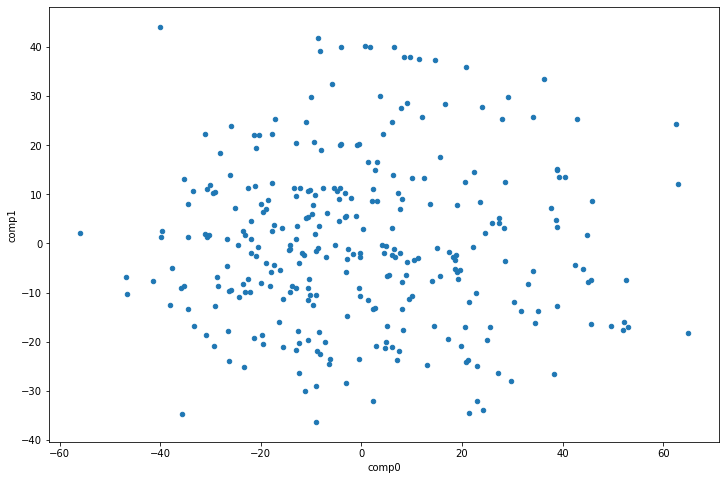

In [94]:
H1.plot(x='comp0', y='comp1', kind='scatter',figsize=(12,8))

In [95]:
H1.to_csv('New_H1.csv')